<a href="https://colab.research.google.com/github/werowe/HypatiaAcademy/blob/master/ml/hand_writing_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code is from [Deep Learning with Python](https://www.amazon.com/Deep-Learning-Python-Francois-Chollet/dp/1617294438) by Francois Chollet.  He wrote the Keras deep learning SDK while working for Google.


In [65]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt



from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [54]:
train_images.shape

(60000, 28, 28)

In [55]:
len(train_labels)

60000

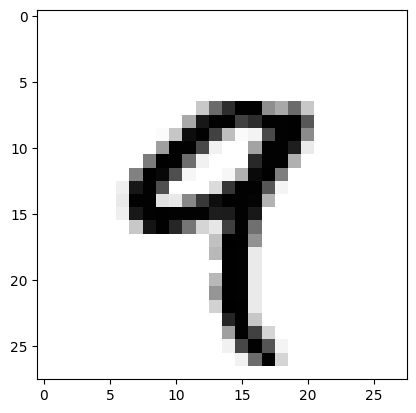

In [66]:
digit=train_images[4]

# Example: Flattened image
flattened_digit = train_images[4].reshape(-1)  # Simulate a flattened image

# Reshape the flattened image back to 28x28
reshaped_digit = flattened_digit.reshape(28, 28)

plt.imshow(reshaped_digit, cmap=plt.cm.binary)

In [67]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

grayscale handwritten images

In [68]:
test_images.shape

(10000, 28, 28)

In [69]:
len(test_labels)

10000

In [70]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)


2nd layer is softmax layer of 10 scalars, each a percentage that the image classification is correct


In [71]:

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

We pick:

* **loss function** measure performance on training data

* **optimizer** how the model will update itself based upon the loss function

* ** metrics to monitor** will use accuracy

In [72]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [73]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [78]:
history = model.fit(train_images, train_labels,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 4s 6ms/step - loss: 0.0349 - accuracy: 0.9897 - val_loss: 0.0326 - val_accuracy: 0.9898
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0251 - accuracy: 0.9919 - val_loss: 0.0397 - val_accuracy: 0.9880
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0192 - accuracy: 0.9941 - val_loss: 0.0410 - val_accuracy: 0.9879
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0146 - accuracy: 0.9958 - val_loss: 0.0462 - val_accuracy: 0.9864
Epoch 5/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0101 - accuracy: 0.9970 - val_loss: 0.0395 - val_accuracy: 0.9893
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0074 - accuracy: 0.9977 - val_loss: 0.0468 - val_accuracy: 0.9877
Epoch 7/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0042 - accuracy: 0.9991 - val_loss: 0.0369 - val_accuracy: 0.9892
Epoch 

In [75]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 40ms/step


array([2.1714420e-08, 1.4532833e-09, 5.8552218e-06, 1.5278347e-05,
       5.3898197e-12, 9.5464801e-09, 2.4830968e-12, 9.9997818e-01,
       7.1439075e-08, 6.6309229e-07], dtype=float32)

In [ ]:
predictions[0].argmax()

In [ ]:
predictions[0][7]

In [ ]:
test_labels[0]

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

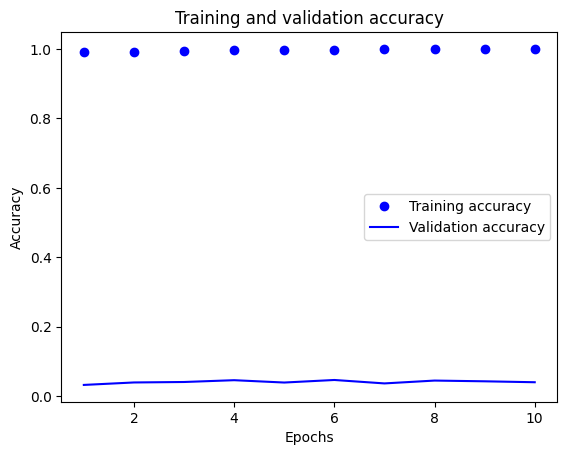

In [79]:
# Extract accuracy values
acc = history.history['accuracy']
val_loss = history.history['val_loss']

# Extract epoch numbers
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()